In [1]:
import random

In [2]:
hello_rules = '''
say_hello = names hello tail
names = name names | name
name = jhon | mike | jack
hello = 你好 | 您来啦 | 快请进
tail = 呀 | !
'''

In [3]:
def get_generalion_by_gram(grammar_str: str, target, stmt_split='=', or_split='|'):
    rules = dict()
    for line in grammar_str.split('\n'):
        if not line:
            continue
        stmt, expr = line.split(stmt_split)
        rules[stmt.strip()] = expr.split(or_split)
    generated = generate(rules, target=target)
    return generated

In [4]:
def generate(grammar_rule, target):
    if target in grammar_rule:
        candidates = grammar_rule[target]
        candidate = random.choice(candidates)
        return ''.join(generate(grammar_rule, target=c.strip()) for c in candidate.split())
    else:
        return target

In [5]:
get_generalion_by_gram(hello_rules, target='say_hello', stmt_split='=')

'mike快请进呀'

In [6]:
corpus = '/Users/LS/AI/第1节 基于语法树和概率的AI模型/article_9k.txt'

In [7]:
FILE = open(corpus, 'r', encoding='UTF-8').read()

In [8]:
len(FILE)

33425826

In [9]:
FILE[:500]

'此外自本周6月12日起除小米手机6等15款机型外其余机型已暂停更新发布含开发版体验版内测稳定版暂不受影响以确保工程师可以集中全部精力进行系统优化工作有人猜测这也是将精力主要用到MIUI9的研发之中MIUI8去年5月发布距今已有一年有余也是时候更新换代了当然关于MIUI9的确切信息我们还是等待官方消息\n骁龙835作为唯一通过Windows10桌面平台认证的ARM处理器高通强调不会因为只考虑性能而去屏蔽掉小核心相反他们正联手微软找到一种适合桌面平台的兼顾性能和功耗的完美方案报道称微软已经拿到了一些新的源码以便Windows10更好地理解biglittle架构资料显示骁龙835作为一款集成了CPUGPU基带蓝牙WiFi的SoC比传统的Wintel方案可以节省至少30的PCB空间按计划今年Q4华硕惠普联想将首发骁龙835Win10电脑预计均是二合一形态的产品当然高通骁龙只是个开始未来也许还能见到三星Exynos联发科华为麒麟小米澎湃等进入Windows10桌面平台\n此前的一加3T搭载的是3400mAh电池DashCharge快充规格为5V4A至于电池缩水可能与刘作虎所说一加手机5要做市面最轻薄'

In [11]:
import jieba

In [12]:
max_length = 1000000
sub_file = FILE[:max_length]

In [13]:
def cut(string):
    return list(jieba.cut(string))

In [14]:
TOKENS = cut(sub_file)

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\LS\AppData\Local\Temp\jieba.cache
Loading model cost 0.890 seconds.
Prefix dict has been built succesfully.


In [15]:
len(TOKENS)

532454

In [16]:
from collections import Counter

In [17]:
words_count = Counter(TOKENS)

In [18]:
words_count.most_common(20)

[('的', 28764),
 ('在', 7563),
 ('了', 6529),
 ('是', 4883),
 ('和', 4245),
 ('也', 2531),
 ('月', 2433),
 ('有', 2374),
 ('将', 2114),
 ('他', 1960),
 ('年', 1959),
 ('对', 1795),
 ('都', 1720),
 ('中', 1699),
 ('为', 1686),
 ('日', 1674),
 ('等', 1655),
 ('与', 1601),
 ('中国', 1597),
 ('上', 1583)]

In [19]:
words_with_fre = [f for w, f in words_count.most_common()]

In [20]:
import matplotlib.pyplot as plt

In [21]:
words_with_fre[:10]

[28764, 7563, 6529, 4883, 4245, 2531, 2433, 2374, 2114, 1960]

In [22]:
import numpy as np

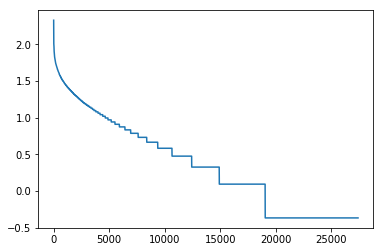

In [23]:
plt.plot(np.log(np.log(words_with_fre)))

In [24]:
_2_gram_words = [
    TOKENS[i] + TOKENS[i + 1] for i in range(len(TOKENS) - 1)
]

In [25]:
_2_gram_words[:10]

['此外自', '自本周', '本周6', '6月', '月12', '12日起', '日起除', '除小米', '小米手机', '手机6']

In [26]:
_2_gram_word_counts = Counter(_2_gram_words)

In [27]:
words_count.most_common()[-1][-1]

1

In [28]:
def get_1_gram_count(word):
    if word in words_count:
        return words_count[word]
    else:
        return words_count.most_common()[-1][-1]

In [29]:
def get_2_gram_count(word):
    if word in _2_gram_word_counts:
        return _2_gram_word_counts[word]
    else:
        return _2_gram_word_counts.most_common()[-1][-1]

In [30]:
def get_gram_count(word, wc):
    if word in wc:
        return wc[word]
    else:
        return wc.most_common()[-1][-1]

In [31]:
get_gram_count('XXX',words_count)

1

In [32]:
get_gram_count('XXX', _2_gram_word_counts)

1

In [33]:
def two_gram_model(sentence):
    tokens = cut(sentence)
    probability = 1
    for i in range(len(tokens) - 1):
        word = tokens[i]
        next_word = tokens[i + 1]
        
        _two_gram_c = get_gram_count(word+next_word, _2_gram_word_counts)
        _one_gram_c = get_gram_count(next_word, words_count)
        pro =  _two_gram_c / _one_gram_c
        
        probability *= pro
        
    return probability

In [34]:
two_gram_model('前天早上吃晚饭的时候')

7.429922323539344e-07